# <span style="color:#1E90FF"> <strong>  Gravitational-Wave Sky Localizations: visualization and basic information </strong> </span>

This is the first of a series of tutorials focusing on some  basic strategies for working with gravitational-wave sky maps in the context of the EM-followUP activity. Here we cover:

1. Sky map visualization using Aladin Desktop (1 h)
2. Healpix/Healpy (40 minutes)
3. Finding the sky position of the maximum probability density pixel (1 hour)

## Setting up the Python Environment
The following packages are needed for working with this tutorial: Astropy, Healpy, and Numpy. We will also utilize Matplotlib, Scipy, and Astroquery. All of these packages can be installed using Pip.

In [208]:
import sys
!{sys.executable} -m pip install "astropy" "healpy" 

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# 1. GW sky localizations in Aladin Desktop

The exercise focuses on the GUI/script commands to organize the Aladin stack planes. Reference manual on Aladin script commands is [here](http://aladin.u-strasbg.fr/java/AladinScriptManual.gml).

###  1.1 Organize the Aladin stack planes
<span style="color:#B22222"> <strong> 1.1.1 Launch [Aladin](http://aladin.u-strasbg.fr/java/nph-aladin.pl?frame=downloading) - Official version v10.076  </strong> </span>
* java -Xmx2g -jar Aladin.jar

<span style="color:#B22222"> <strong> 1.1.2 Create six stack folders: GW150914, GW151226, GW170104, GW170608, GW170814, GW170817 </strong> </span>

* [Using Aladin GUI](https://drive.google.com/open?id=1F8mk2PHhkoboy_i0esd7fRzsvTUq-Iee)
* [Using Aladin Console](https://drive.google.com/open?id=1aVL5jXcvbX2MfDICvXv6W2pFdvT7sObC)  
    * [Open Aladin Console](https://drive.google.com/open?id=1iK9Zqq_SlKJBYUKlj0TDZ5jc9RQdk_SB) 

<span style="color:#B22222"> <strong>  1.1.3. Load the refined sky localizations (LALInference) from the <a href="https://losc.ligo.org/about/">LIGO and Virgo Open Science Center</a> </strong> </span> 
*  [GW150914](https://losc.ligo.org/s/events/GW150914/P1500227/LALInference_skymap.fits.gz)
*  [GW151226](https://losc.ligo.org/s/events/GW151226/P1500227/LALInference_skymap_2.fits.gz)
*  [GW170104](https://losc.ligo.org/s/events/GW170104/P1500227/LALInference_f.fits.gz)
*  [GW170608](https://dcc.ligo.org/public/0147/G1702263/001/LALInference-P.fits.gz)
*  [GW170814](https://dcc.ligo.org/public/0145/T1700453/001/LALInference_v1.fits.gz)
*  [GW170817](https://dcc.ligo.org/public/0146/G1701985/001/LALInference_v2.fits.gz)
    * [Using Aladin GUI](https://drive.google.com/open?id=1Q7m-ui-506ZtQdGblC-QhygjT3RRdugQ)
    * [Using Aladin Console](https://drive.google.com/open?id=1I0gKvyzebUJ3FBSccppLdhQf__UFZc-r)
    * Typing the URL on the <em>Command</em> box (on the top of the main Aladin window)
    
<span style="color:#B22222"> <strong>  1.1.4. Rename the sky localizations files <em>in</em></strong> </span>
* GW150914_lali
* GW151226_lali
* GW170104_lali
* GW170608_lali
* GW170814_lali
* GW170817_lali

    * Using Aladin GUI (right-click on the plane to open the *Properties* window)
    * [Using Aladin Console](https://drive.google.com/open?id=12HxyKZNmIEe1CwOeDijLg2pno8KtdJgz) 

<span style="color:#B22222"> <strong> 1.1.5. Move the sky localization files in the specific folders </strong>  </span>    
*  Using Aladin GUI (drag the file in the folder)
* [Using Aladin Console](https://drive.google.com/open?id=135CXJolfqMypXTgsA78kKlWGTUdlzIIT)

##  <span style="color:#483D8B"> <strong> POLL 1. What does the value on the top right of the Aladin window represent?</strong> </span>

[Answer to the online poll](http://freeonlinesurveys.com/p/2o5ISYPT?qid=1053193)


### 1.2 Python script controlling Aladin via SAMP
The interoperability between the Aladin Sky Atlas and the Python function outputs is obtained using [SAMP](http://www.ivoa.net/documents/SAMP/) (Simple Application Messaging Protocol).

SAMP is a protocol that is used by a number of other tools such as [TOPCAT](http://www.star.bris.ac.uk/~mbt/topcat/), [SAO Ds9](http://ds9.si.edu/site/Home.html), and [Aladin](http://aladin.u-strasbg.fr/); it is possible to send and receive data *to* and *from* these tools.
Here the [Aladin script commands](http://aladin.u-strasbg.fr/java/AladinScriptManual.gml) are converted in Python strings and sent via [SAMPIntegratedClient class](http://jakevdp.github.io/astropy/api/astropy.vo.samp.SAMPIntegratedClient.html#astropy.vo.samp.SAMPIntegratedClient). 

In [201]:
import os.path
import sys

if sys.version > '3':
    import urllib.parse
else:
    import urlparse

from astropy.samp import SAMPIntegratedClient


class AladinViaSAMP(object):

    def __init__(self):
        self._client = SAMPIntegratedClient()
        
    def send_file(self, infile=str()):
        """Sending a file (image or table) to Aladin Sky Atlas using the SAMPIntegratedClient class.
             http://docs.astropy.org/en/stable/vo/samp/example_table_image.html
        """   
     
        self._client.connect()
        params = {}

        if sys.version > '3':
            params["url"] = urllib.parse.urljoin('file:', os.path.abspath(infile))
        else:
            params["url"] = urlparse.urljoin('file:', os.path.abspath(infile))
            
        message = {}
        message[ "samp.mtype" ] = "image.load.fits"
        message[ "samp.params" ] = params
     
        self._client.notify_all(message)
        self._client.disconnect()


    def send_script_command(self, script=str()):
        """Sending a script to Aladin Sky Atlas using the SAMPIntegratedClient class.
           http://docs.astropy.org/en/stable/vo/samp/example_table_image.html
         """

        self._client.connect()

        params = {}
        message = {} 
        message[ "samp.mtype" ] = "script.aladin.send"
        message[ "samp.params" ] = { "script" : script }  

        self._client.notify_all(message)
        self._client.disconnect()


class AladinScriptCommands(AladinViaSAMP):
    """A set of the main script commands for Aladin console.
        http://aladin.u-strasbg.fr/java/AladinScriptManual.gml"""
  
    def load_md_mv(self, skymap, url):
        """A set of aladin commands; load; md; mv."""
              
        load_md_mv_str = skymap + '=' + ' '+ 'load'+ ' ' + url + ';sync;' \
        + 'md '+skymap + '_LALI;' \
        + 'mv ' +skymap + ' '+skymap + '_LALI;'

        return self.send_script_command(load_md_mv_str)

#### Here we write a short script to do the same actions in **1.1** but using the SAMP protocol.

In [202]:
# Download LALInference skymaps 
from astropy.utils.data import download_file

urls = ['https://losc.ligo.org/s/events/GW150914/P1500227/LALInference_skymap.fits.gz',
        'https://losc.ligo.org/s/events/GW151226/P1500227/LALInference_skymap_2.fits.gz',
        'https://losc.ligo.org/s/events/GW170104/P1500227/LALInference_f.fits.gz',
        'https://dcc.ligo.org/public/0147/G1702263/001/LALInference-P.fits.gz',
        'https://dcc.ligo.org/public/0145/T1700453/001/LALInference_v1.fits.gz',
        'https://dcc.ligo.org/public/0146/G1701985/001/LALInference_v2.fits.gz']

# folder name
final_skymaps = ['GW150914', 'GW151226', 'GW170104', 
                 'GW170608', 'GW170814', 'GW170817']

aladin = AladinScriptCommands() # init.

for url, final_skymap in zip(urls, final_skymaps):
    filename = download_file(url, cache=True)
    aladin.load_md_mv(final_skymap, filename)

## <span style="color:#B22222"> <strong> Exercise 1 </strong>  </span>  
Get the following hips images from the [HiPS servers](http://aladin.u-strasbg.fr/java/nph-aladin.pl?frame=aladinHpxList)  using the function *get hips(...)* via SAMP

        1) DSS
        2) Fermi
        3) Mellinger
        4) 2MASS
        5) SDSSDR9-color 
        6) IRIS Color
        7) AKARI FIS Color

# 2. Healpy: reading and plotting

Now we read the HEALPix file with healpy getting the probability and the header. The skymap contains the first column which is the probability sky map. This is the probability that the source is contained in pixel $i$, centered on the direction $\vec{n}_i$. For 3D skymaps, 3 additional columns remain which are DISTMU, DISTSTD, and DISTNORM.

In [212]:
# LALInference skymap of GW150914 
filename = download_file('https://dcc.ligo.org/public/0146/G1701985/001/LALInference_v2.fits.gz', 
                         cache=True)

In [213]:
import healpy as hp
prob = hp.read_map(filename, verbose=False) # reading the first column which contains the probability 

## 2.1 Creating skymap plots

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


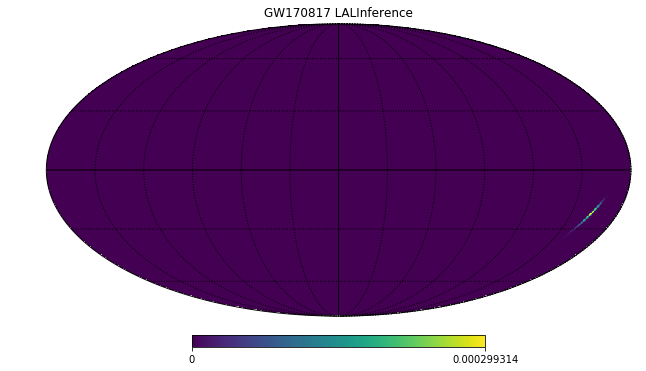

In [214]:
from matplotlib import pyplot as plt # plotting skymaps
hp.mollview(prob, title='GW170817 LALInference')
hp.graticule(local=True) # adding the GRID
plt.show()

## <span style="color:#B22222"> <strong> Exercise 2 </strong>  </span>  
Create skymap plots with equatorial coordinates for the all events detected so far (use the final skymaps).

## 2.2 Header

The header contains relevant metadata about the event and the skymap and we will print it explicitly. Often, the circulars written by the LIGO and Virgo Collaborations contain information from the skymap headers.

In [215]:
prob, header = hp.read_map(filename, h=True, verbose=False)  # reading also the header

print(type(header)) # it is a list

header = dict(header) # converting in a dictionary

print (type(header)) # it is a dictionary
print(header)

<class 'list'>
<class 'dict'>
{'XTENSION': 'BINTABLE', 'BITPIX': 8, 'NAXIS': 2, 'NAXIS1': 32, 'NAXIS2': 12582912, 'PCOUNT': 0, 'GCOUNT': 1, 'TFIELDS': 4, 'TTYPE1': 'PROB', 'TFORM1': 'D', 'TUNIT1': 'pix-1', 'TTYPE2': 'DISTMU', 'TFORM2': 'D', 'TUNIT2': 'Mpc', 'TTYPE3': 'DISTSIGMA', 'TFORM3': 'D', 'TUNIT3': 'Mpc', 'TTYPE4': 'DISTNORM', 'TFORM4': 'D', 'TUNIT4': 'Mpc-2', 'PIXTYPE': 'HEALPIX', 'ORDERING': 'NESTED', 'COORDSYS': 'C', 'NSIDE': 1024, 'INDXSCHM': 'IMPLICIT', 'OBJECT': 'GW170817', 'DATE-OBS': '2017-08-17T12:41:04.429237', 'MJD-OBS': 57982.52852348645, 'DATE': '2017-09-26T14:24:08.382958', 'CREATOR': 'run_sky_area', 'ORIGIN': 'LIGO/Virgo', 'DISTMEAN': 38.58938617448738, 'DISTSTD': 6.996864447652665, 'VCSVERS': 'skyarea 0.3.2', 'VCSSTAT': '', 'VCSREV': '', 'DATE-BLD': '', 'HISTORY': 'tidal_P28.dat --objid GW170817'}


#### Here we show how is easy to get header information using a dictionary!

In [216]:
nside = header['NSIDE'] # Resolution parameter of HEALPIX
print (nside)

DATE_OBS = header['DATE-OBS'] # UTC date of the observation 
print (DATE_OBS)

DISTMEAN = header['DISTMEAN'] # DISTMEAN is the posterior mean distance in Mpc
print (DISTMEAN)

DISTSTD = header['DISTSTD'] # and DISTSTD is the posterior standard deviation of the distance in Mpc
print (DISTMEAN)

1024
2017-08-17T12:41:04.429237
38.58938617448738
38.58938617448738


## 2.3 How to visualize the FITS header in Aladin Desktop?
Select the plane of this image in the plane stack by clicking on its name and press select the menu <span style="color:#B22222"> <strong> Edit -> FITS header. 

## 2.4 3D sky maps
[Singer et al.(2016)](https://arxiv.org/pdf/1603.07333v2.pdf) discuss a rapid algorithm for obtaining a three-dimensional probability estimates of sky location and luminosity distance from observations of binary 
compact object mergers with Advanced LIGO and Virgo. Combining the reconstructed gravitational wave volumes with positions and redshifts of possible host  galaxies  provides  a  manageable  list  of  sky location  targets  to  search  for  the  electromagnetic 
counterpart of the gravitational wave signal.

The marginal distance posterior distribution integrated over the whole sky is reported in the header *with* 

       DISTMEAN    /Posterior mean distance (Mpc)
       DISTSTB     / Posterior standard deviation of distance (Mpc)

## <span style="color:#B22222"> <strong> Exercise 3 </strong>  </span>  
Fill the table with the values in the header.

|      Event and skymap          |  N<sub>side</sub> | Event time  | DISTMEAN | DISTSTD |
|----------------- --------------|---------------------------------|----------|---------|
|   **GW150914** - LALInference  |                   |             |          |         |         
|   **GW151226** - LALInference  |                   |             |          |         |   
|   **GW170104** - LALInference  |                   |             |          |         |
|   **GW170608** - LALInference  |                   |             |          |         |
|   **GW170814** - LALInference  |                   |             |          |         |
|   **GW170817** - LALInference  |                   |             |          |         |

# 3. LIGO/Virgo probability sky maps
 
Probability sky maps associated with a gravitational-wave signal detected by 
the Advanced LIGO and Virgo are given as all-sky 
images stored in the [HEALPix](http://healpix.sourceforge.net/)
(Hierarchical Equal Area isoLatitude Pixelisation) projection.
The  sphere  is  hierarchically tessellated into curvilinear quadrilaterals; 
the resolution of the tessellation can be increased by the division of each pixel into four new ones.  
The lowest resolution partition is comprised of twelve base pixels.
The pixel position on the sky is uniquely specified by the index in the array and the array’s length.
The resolution of the grid is expressed by the parameter N<sub>side</sub>,
and the total number of pixels equal to N<sub>pixs</sub> = 12 x N<sub>side</sub><sup>2</sup>. In such context, the value stored at each pixel represents the probability that the gravitational-wave source 
is located within that pixel (see [LIGO-Virgo EM Follow-Up Tutorial](http://nbviewer.jupyter.org/github/lpsinger/ligo-virgo-emfollowup-tutorial/blob/master/ligo-virgo-emfollowup-tutorial.ipynb)).  

In [163]:
from IPython.display import Image
from IPython.display import display
display(Image(url='https://healpix.jpl.nasa.gov/images/healpixGridRefinement.jpg'))

**FIG.1.** It shows the partitioning of a sphere at progressively higher resolutions, from left to right. The green sphere represents the lowest resolution possible with the HEALPix base partitioning of the sphere surface into 12 equal sized pixels. The yellow sphere has a HEALPix grid of 48 pixels, the red sphere has 192 pixels, and the blue sphere has a grid of 768 pixels (more information [here](https://healpix.jpl.nasa.gov/)).

Next, it will be useful for us to have the HEALPix resolution on hand.

In [164]:
npix = len(prob)
nside = hp.npix2nside(npix)
npix, nside

(3145728, 512)

Another way to get the same information is to use the Healpy functions get_map_size and get_nside.

In [99]:
hp.get_map_size(prob)

3145728

In [100]:
hp.get_nside(prob)

512

The relationship between N<sub>pixs</sub> = 12 x N<sub>side</sub><sup>2</sup>.

In [146]:
Npixs = 12*nside*nside
print (Npixs)

3145728


## <span style="color:#B22222"> <strong> Exercise 4 </strong>  </span> 
Compute the pixel area given N<sub>side</sub> = 512 in square radians and square degrees (the area of all pixels at a given resolution are identical).

##  <span style="color:#483D8B"> <strong> POLL 2. The lowest resolution partition in HEALPix is </strong> </span>

[Answer to the online poll](http://freeonlinesurveys.com/p/4B4U8F1a?qid=1053359)

##  <span style="color:#483D8B"> <strong> POLL 3. At a given resolution the shape and the area are the same for all pixels </strong> </span>

[Answer to the online poll](http://freeonlinesurveys.com/p/rFICBQWa?qid=1053361)

# 4. Finding the maximum probability density pixel

Sometimes it is useful to find the sky position (RA, DEC) of the maximum probability density pixel.

In [130]:
import numpy as np

ipix_max = np.argmax(prob) # array's position
print (ipix_max) 
prob[ipix_max] # probability inside it


3048817


6.780870899092406e-05

Next we call `pix2ang` to get the spherical polar coordinates $(\theta, \phi)$ in radians, and then use Numpy's [`rad2deg`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.rad2deg.html) function to convert these to right ascension and declination in degrees.

In [128]:
theta, phi = hp.pix2ang(nside, ipix_max)
ra = np.rad2deg(phi)
dec = np.rad2deg(0.5 * np.pi - theta)
ra, dec

(134.79545454545453, -69.793893731105584)

## <span style="color:#B22222"> <strong> Exercise 5 </strong>  </span>  

Find the sky positions of the maximum probability pixels of the GW sky localization skymaps issued so far (preliminary/final). Label them in the Aladin plane. Finally calculate the airmass at the time of the event at the ESO Paranal site.

## <span style="color:#B22222"> <strong> Exercise 6 </strong>  </span> 
Find the separation from the sky position of the maximum probaility pixel found in the *rapid* skymaps and the sky position of the maximum probability pixel found in the *final* skymaps. 